In [331]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [116]:
diabetes_df = pd.read_csv('/Users/risharane/Downloads/diabetes.csv')

In [117]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [118]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking the Null values

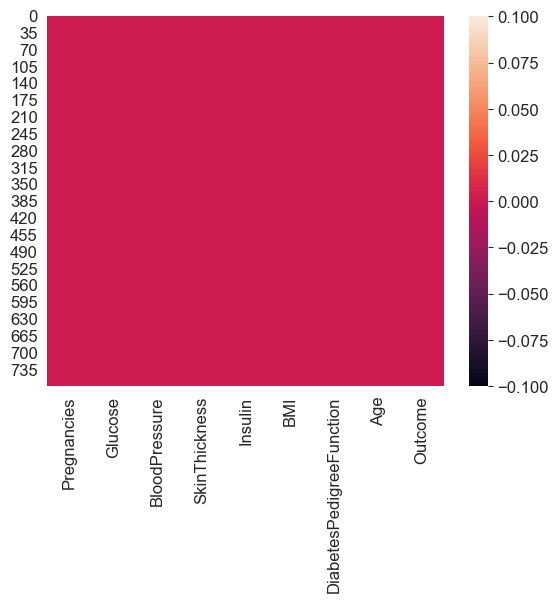

In [119]:
sns.heatmap(diabetes_df.isna());

Conslusion : There are no null values

## Exploratory Data Analysis & Visualization

In [120]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12

In [121]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [122]:
diabetes_df.rename(columns = {'Outcome' : 'Diabetes_Status'}, inplace = True)

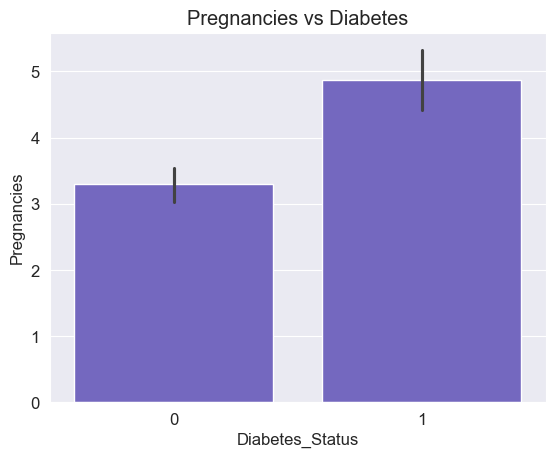

In [123]:
plt.title('Pregnancies vs Diabetes')
preg = sns.barplot(x = 'Diabetes_Status', y = 'Pregnancies', data = diabetes_df, color = 'slateblue');

Conclusion :  No.of pregnancies > 3, more chances of diabetes. But still not the major differnce

In [124]:
diabetes_df.Diabetes_Status.corr(diabetes_df.Pregnancies) 

0.22189815303398666

Pregnancies has very less correlation with diabetes status

In [125]:
age = px.histogram(diabetes_df, x = 'Age', color = 'Diabetes_Status' ,color_discrete_sequence=['darkslateblue', 'darkorange'], title = 'Effect of Age on Diabetes')
age.update_layout(bargap = 0.5)

Conclusion : Having diabetes is more common for people above 40 

In [126]:
diabetes_df.Diabetes_Status.corr(diabetes_df.Age)

0.23835598302719757

In [127]:
age = px.histogram(diabetes_df, x = 'BloodPressure', color = 'Diabetes_Status' ,color_discrete_sequence=['navy', 'darkolivegreen'], title = 'Effect of Age on Diabetes')
age.update_layout(bargap = 0.5)

Diastolic Blood Pressure (mm Hg)<br>
Normal : 60 - 80 <br>
High : > 80<br>
Low : < 60

Conclusion : Majority of people have 'Normal Diastolic Blood Pressure'. Majority of people in this group have no diabetes. There is a very slight increase in the no of diabetes patients having High Diastolic blood  Pressure

In [128]:
diabetes_df.Diabetes_Status.corr(diabetes_df.BloodPressure)

0.06506835955033279

In [129]:
px.scatter(diabetes_df, x = 'Age', y = 'BloodPressure', color = 'Diabetes_Status', title = 'Age & Blood Pressure')

Conclusion : If age is above 40 & Blood Pressure is above 60 there there are chances of having diabetes

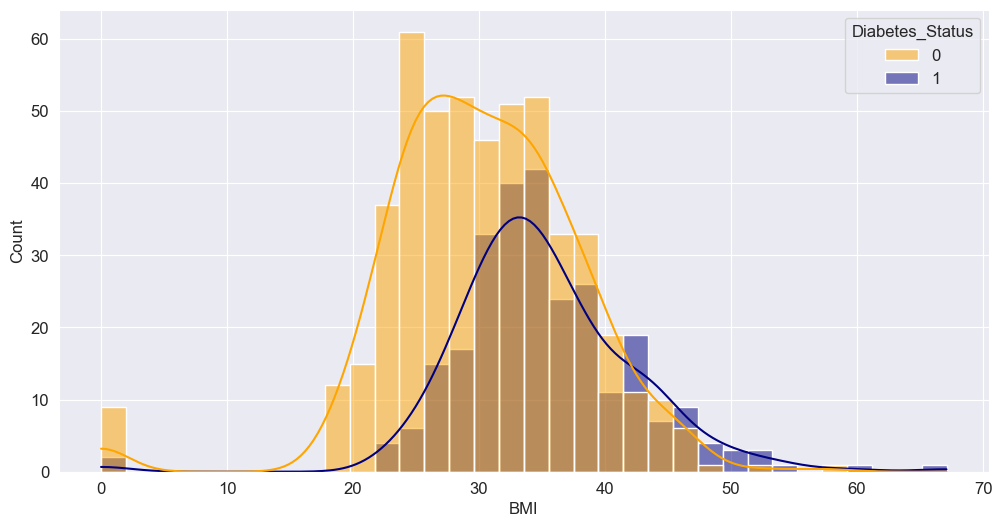

In [130]:
plt.figure(figsize = (12, 6))
sns.histplot(x= 'BMI', kde = True, data = diabetes_df, hue = 'Diabetes_Status', palette = ['orange', 'navy']);

Conclusion : People with BMI greater 30 tend to have diabetes

In [131]:
diabetes_df.Diabetes_Status.corr(diabetes_df.BMI)

0.29269466264444527

In [132]:
insulin = px.histogram(diabetes_df, x = 'Insulin', color = 'Diabetes_Status' ,color_discrete_sequence=['navy', 'gold'], title = 'Effect of Age on Diabetes')
insulin.update_layout(bargap = 0.5)

Conclusion : People with insulin greater than 120 are having comparatively high chances of having diabetes

In [133]:
diabetes_df.Diabetes_Status.corr(diabetes_df.Insulin)

0.13054795488404775

In [134]:
glucose = px.histogram(diabetes_df, x = 'Glucose', color = 'Diabetes_Status' ,color_discrete_sequence=['navy', 'lightcoral'], title = 'Effect of Age on Diabetes')
glucose.update_layout(bargap = 0.5)

Conclusion : For glucose > 130, more no. of people tend to have diabetes

In [135]:
diabetes_df.Diabetes_Status.corr(diabetes_df.Glucose)

0.46658139830687384

# Scaling

In [136]:
scaler = MinMaxScaler()

In [137]:
scaler.fit(diabetes_df)

MinMaxScaler()

In [138]:
scaler.data_min_

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.078, 21.   ,
        0.   ])

In [139]:
scaler.data_max_

array([ 17.  , 199.  , 122.  ,  99.  , 846.  ,  67.1 ,   2.42,  81.  ,
         1.  ])

In [140]:
diabetes_df[:] = scaler.transform(diabetes_df[:])

In [143]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes_Status
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


# Training

For input we only considered the columns that has comparatively higher corelation 

In [344]:
X = diabetes_df[[ 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]
y = diabetes_df['Diabetes_Status']

In [345]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [346]:
model = LogisticRegression(solver = 'liblinear')

In [347]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [348]:
actual = y_test
actual

668    0
324    0
624    0
690    0
473    0
      ..
512    0
109    1
587    0
362    0
734    0
Name: Diabetes_Status, Length: 77, dtype: int64

In [349]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [350]:
predicted = model.predict(X_test)

In [378]:
accuracy_score(actual, predicted) * 100

77.92207792207793

In [329]:
confusionMatrix = confusion_matrix(actual, predicted, normalize='true')
confusionMatrix

array([[0.92      , 0.08      ],
       [0.48148148, 0.51851852]])

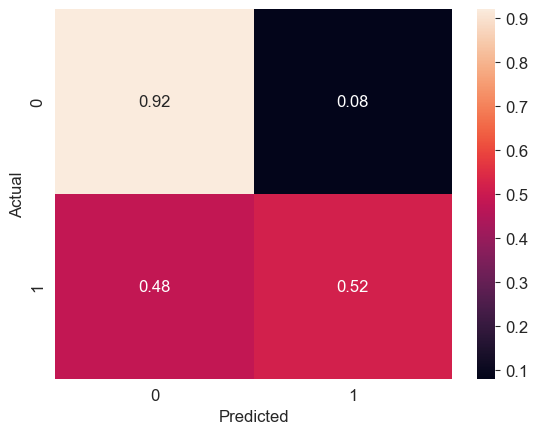

In [330]:
sns.heatmap(confusionMatrix, annot = True);
plt.xlabel("Predicted");
plt.ylabel('Actual');

Conclusion : 

In [338]:
classification_report(actual, predicted)

'              precision    recall  f1-score   support\n\n           0       0.78      0.92      0.84        50\n           1       0.78      0.52      0.62        27\n\n    accuracy                           0.78        77\n   macro avg       0.78      0.72      0.73        77\nweighted avg       0.78      0.78      0.77        77\n'